<font size="7">Image classification with transfer learning</font>

<font size="5">Group: HAT</font>

<font size="5">Instructor: Dr. Lê Thành Sách</font>

| Name            | ID |
| --------------- | --- |
| Nguyễn Thiên Ân | 2270710 |
| Huỳnh Nhữ Hùng  | 2270712 |
| Nguyễn Thanh Khải Tâm | 2270163 |

The target of this project is to utilize three models (ResNet50, MobileNetV2, EfficientNetB5) to do classification on images. The dataset used to train and test the model is the Sea Animals Image Dataset.

# Import necessary library

In [ ]:
!pip install keras-preprocessing

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
from prettytable import PrettyTable
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

#for visualization
import matplotlib.pyplot as plt
from tabulate import tabulate
from keras.utils import plot_model

# Images
import PIL
from PIL import Image
from PIL import Image
import os, sys
import glob

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from prettytable import PrettyTable
import numpy as np
import pandas as pd
import os

# for dataset splitting and shuffling
import random
import shutil

#For augmentation
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from skimage import io
from PIL import Image

#For data generators
import pathlib


# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten, Embedding, Reshape
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Activation
import pathlib


#Train test split
from sklearn.model_selection import train_test_split

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate


# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Images
import PIL
from PIL import Image
from PIL import Image
import os, sys
import glob

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset and Model overview

## Dataset overview

### ImageNet

#### Introduction
- ImageNet is an extensive dataset, initially containing over 14 million images covering a vast range of objects, animals, scenes, and more.
- These images are categorized into more than 21,000 synsets (synonym sets) based on the WordNet hierarchical structure. The term "synset" is used in the context of ImageNet to refer to a set of synonymous words that describe a concept or category.

![Some synsets within ImageNet](https://devopedia.org/images/article/172/7316.1561043304.png) \
*Some synsets within ImageNet*

- On average, there are over 500 images per subcategory. The category "animal" is most widely covered with 3822 subcategories and 2799K images. The "appliance" category has on average 1164 images per subcategory, which is the most for any category. Among the categories with least number of images are "amphibian", "appliance", and "utensil".

![Treemap visualization of first-level subcategories of geological formations](https://devopedia.org/images/article/172/1112.1562158549.jpg) \
*Treemap visualization of first-level subcategories of geological formations*
- As many as 1,034,908 images have been annotated with bounding boxes. For example, if an image contains a cat as its main subject, the coordinates of a rectangle that bounds the cat are also published on ImageNet. This makes it useful for computer vision tasks such as object localization and detection.



#### Research Impact
- ImageNet was pivotal in advancing deep learning and convolutional neural networks (CNNs). Models like AlexNet, VGGNet, GoogLeNet, and ResNet, among others, were trained on ImageNet data and achieved state-of-the-art performance in the ILSVRC competitions.
- The ImageNet Challenge led to breakthroughs in image classification, object detection, and image segmentation. It sparked innovation in the field, revolutionizing the way we approach computer vision problems.
- The pretraining of deep neural networks on ImageNet data became a standard practice. Researchers would use pretrained models as a starting point for various computer vision tasks, leading to faster convergence and improved performance. In this project, we also use models with pretrained weights with ImageNet, supported by `keras` for transfer learning.

### Sea Animals Image Dataset🌊




#### Introduction
- The dataset is shared on Kaggle and published by *vencerlanz09*. It can be access [here](https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste/data).
- The dataset contains different images of marine animals.
- Currently, there are 13,711 images which are categorized into 23 different sea animal classes.
- The images are resized to either (300 pixels, $n$) or ($n$, 300 pixels) where $n$ is the size in pixels and less than 300 pixels.
- We will use this dataset to train and predict the images labels, using transfer learning with the original weights from ImageNet.

#### Illustration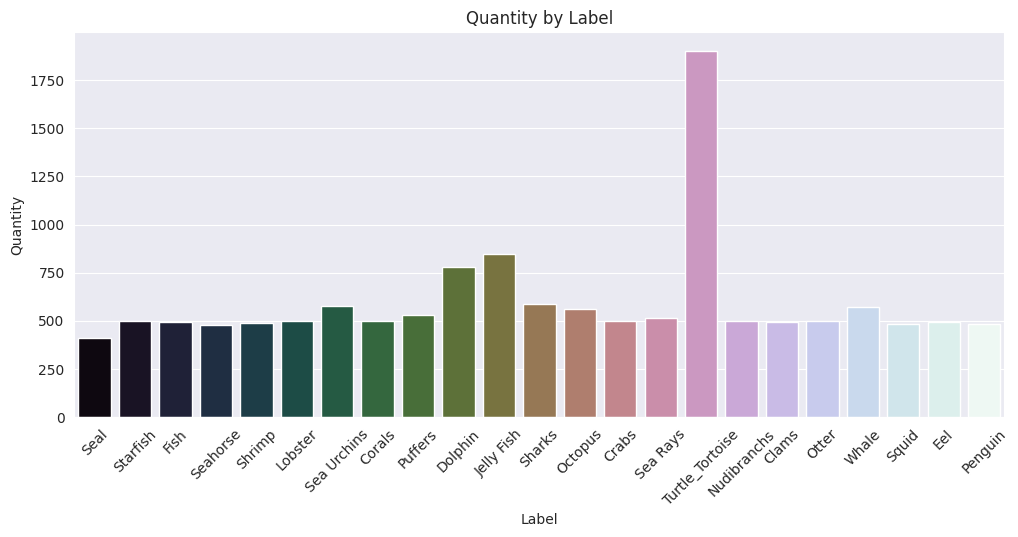

*Number of entities per class*

## Model overview

### Resnet50 (2015)

#### Illustrations

In [ ]:
model_resnet50 = tf.keras.applications.resnet50.ResNet50(include_top=True)

NameError: ignored

In [ ]:
model_resnet50.summary()

In [ ]:
plot_model(model_resnet50, show_shapes=True, show_layer_names=True)

#### Introduction
- ResNet50, short for "Residual Network with 50 layers," is a deep convolutional neural network architecture designed for image classification and computer vision tasks. It is a prominent member of the ResNet family, which was introduced by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in their 2015 paper titled [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385). This architecture marked a significant breakthrough in the field of deep learning, as it effectively addressed the problem of vanishing gradients in very deep neural networks, enabling the training of extremely deep networks with improved accuracy.
-ResNet-50 is composed of 50 layers, and it is a type of convolutional neural network (CNN) designed for image classification tasks. The architecture is characterized by **residual blocks**, which contain **skip connections** (or **shortcuts**) that enable the flow of information through the network without suffering from vanishing gradients.

#### Architecture
- The first few layers of ResNet-50 are typical convolutional and pooling layers for initial feature extraction.
- The core of the network consists of four groups of residual blocks, each with different numbers of blocks. These groups gradually increase the feature map dimensions while reducing spatial resolution.
- The final layers include global average pooling, fully connected layers, and a softmax layer for classification.

#### Residual block & Skip connection
- Each residual block typically consists of two to three convolutional layers with batch normalization and rectified linear unit (ReLU) activations.
- The key innovation in ResNet is the introduction of skip connections, which bypass one or more layers in a block. These skip connections allow the network to learn residuals, or the difference between the output of a layer and its input. The residual is then added back to the output, creating a shortcut connection.

![Residual block](https://d2l.ai/_images/residual-block.svg)\
*Residual block*

### MobileNetV2 (2018)

#### Illustrations

In [ ]:
model_mobilenetv2 = tf.keras.applications.resnet50.ResNet50(include_top=True)

In [ ]:
model_mobilenetv2.summary()

In [ ]:
plot_model(model_mobilenetv2, show_shapes=True, show_layer_names=True)

#### Introduction
- MobileNetV2 was introduced in the paper titled [MobileNetV2: Inverted Residuals and Linear Bottlenecks](https://arxiv.org/abs/1801.04381) , authored by Mark Sandler, Andrew Howard, Menglong Zhu, Andrey Zhmoginov, and Liang-Chieh Chen. The paper was published in 2018
- The model addresses the need for lightweight and computationally efficient neural networks for real-time mobile and edge device applications.
- MobileNetV2 is designed to be a successor to the original MobileNet architecture, offering better performance, faster inference, and reduced computational cost.

#### Architecture
- MobileNetV2 follows a pyramid structure with increasing resolution and decreasing feature maps as you move deeper into the network.
- The network is divided into multiple building blocks, with each block consisting of depthwise separable convolutions, batch normalization, and ReLU activation functions.
- The network has a final global average pooling layer followed by a fully connected layer for classification.

#### Depthwise Separable Convolution
- This is a fundamental building block of MobileNetV2. It decomposes the standard convolution into two separate operations - depthwise convolution and pointwise convolution.
 - Depthwise convolution applies a single convolutional filter to each input channel separately, reducing the number of parameters and computational cost.
 - Pointwise convolution combines the results of depthwise convolution with a 1x1 convolution to create the final output.

![Depthwise Separable Convolution](https://www.researchgate.net/publication/343943234/figure/fig1/AS:1000897064738828@1615643864512/Depthwise-separable-convolution-block.png)\
*Depthwise and Pointwise convolution*

#### Depthwise Separable Convolution
- This is a fundamental building block of MobileNetV2. It decomposes the standard convolution into two separate operations - depthwise convolution and pointwise convolution.
 - Depthwise convolution applies a single convolutional filter to each input channel separately, reducing the number of parameters and computational cost.
 - Pointwise convolution combines the results of depthwise convolution with a 1x1 convolution to create the final output.

![Depthwise Separable Convolution](https://www.researchgate.net/publication/343943234/figure/fig1/AS:1000897064738828@1615643864512/Depthwise-separable-convolution-block.png)\
*Depthwise and Pointwise convolution*

#### Linear Bottlenecks
- The paper emphasizes the use of linear bottlenecks in the expansion layers. These bottlenecks consist of 1x1 convolutions with no nonlinear activation functions, such as ReLU.
- Linear bottlenecks help reduce the computational overhead and enable the network to better model complex functions.

### EfficientNetB5 (2019)

#### Illustrations

In [ ]:
model_efficientnetb5 = tf.keras.applications.resnet50.ResNet50(include_top=True)

In [ ]:
model_efficientnetb5.summary()

In [ ]:
plot_model(model_efficientnetb5, show_shapes=True, show_layer_names=True)

#### Introduction
- EfficientNetB5 is part of a series of models introduced by Mingxing Tan and Quoc V. Le in their 2019 paper titled [EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/abs/1905.11946).
- EfficientNetB5 is a convolutional neural network (CNN) architecture that belongs to the EfficientNet family of models. These models are known for their impressive efficiency-accuracy trade-offs, making them suitable for a wide range of computer vision tasks. EfficientNetB5 is specifically designed to provide a balance between model size and computational efficiency while achieving remarkable performance.
- EfficientNet models use a novel compound scaling method to determine the architecture's depth, width, and resolution. This method efficiently scales the model by balancing these dimensions, resulting in better performance.
- EfficientNetB5 represents a specific scaling of the base architecture, and the 'B5' designation indicates the scaling coefficient for depth, width, and resolution.

#### Architecture
- EfficientNetB5, like other models in the family, consists of convolutional layers, normalization layers, and various building blocks.
- It features a **compound scaling** of the baseline architecture, which means it has more layers and channels to capture complex features.
- The architecture includes depthwise separable convolutions to reduce computational requirements while preserving expressive power.

#### Compound Scaling Coefficients
- EfficientNetB5 has higher coefficients for depth, width, and resolution compared to smaller variants like EfficientNetB0. These coefficients determine how much each dimension is scaled.
- The scaling coefficients are optimized to maximize performance given a certain computational budget.

#### Efficient Blocks
- The building blocks within the architecture are called "Efficient Blocks."
- These blocks are based on depthwise separable convolutions, which split the convolution operation into depthwise and pointwise convolutions, reducing both computation and the number of parameters.
- Efficient Blocks are stacked to create the network's architecture.

#### Swish Activation Function
- EfficientNet models often use the Swish activation function instead of the traditional ReLU activation. Swish has been shown to improve the model's performance.
- Swish can be defined mathematically as:
$\text{Swish}(x) = x * \text{sigmoid}(\beta x)=\dfrac{x}{1+e^{-\beta x}}$, where $\beta$ is either constant or a trainable parameter depending on the model.
- Swish is a smooth, non-monotonic activation function that combines a linear function and a sigmoid function. This combination allows for a continuous gradient, making it amenable to gradient-based optimization.
- The non-monotonic nature of Swish means it can handle a wider range of inputs without causing saturation issues. This can be especially beneficial for deep networks, where vanishing gradients can be a problem.
- While Swish offers advantages in training and performance, it is slightly more computationally expensive than ReLU due to the inclusion of the sigmoid function.

# Implementation

##Install package & check speed GPU

## Install Gdown for downloading files stored in Google drive

In [ ]:
!pip install gdown

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
6.40182532099999
GPU (s):
0.09320125099999643
GPU speedup over CPU: 68x


## Create folder for Kaggle API and Download dataset
We use Kaggle API to download dataset the dataset in folder content

In [ ]:
# We need to place file kaggle.json in root to use kaggle API to download dataset
!mkdir ~/.kaggle
!gdown 1hOaGMilJuZmHpgNy9QXOei6zdgM-ONx6
#!cp /content/kaggle.json ~/.kaggle/
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Downloading...
From: https://drive.google.com/uc?id=1hOaGMilJuZmHpgNy9QXOei6zdgM-ONx6
To: /content/kaggle.json
100% 63.0/63.0 [00:00<00:00, 310kB/s]


In [ ]:
!kaggle datasets download -d vencerlanz09/sea-animals-image-dataste

 93% 289M/312M [00:02<00:00, 117MB/s]
100% 312M/312M [00:02<00:00, 112MB/s]


In [ ]:
!unzip /content/sea-animals-image-dataste.zip -d /content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Seahorse/9891995103_849905035f_o.jpg  
  inflating: /content/dataset/Seahorse/9984393_fb8ac77d6a_o.jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (1).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (10).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (11).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (12).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (13).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (14).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (15).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (16).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (17).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (18).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (19).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (2).jpg  
  inflating: /content/dataset/Seahorse/Sea Horse (20).jpg  
  inflating: /content/dataset/Seahor

## Dataset preparation

### Dataset overview

In [ ]:
#Function to check number of images of each label
def TotalImages(path):
    src = os.listdir(path)
    data = []

    for lb in src:
        x = os.path.join(path, lb)
        y = os.listdir(x)
        data.append([lb, len(y)])

    # Create the table using tabulate
    table = tabulate(data, headers=["Label", "Number of Images"], tablefmt="fancy_grid")

    # Print the table
    print(table)

In [ ]:
# Load dataset
dataset_path = "/content/dataset"
TotalImages(dataset_path)
labels = os.listdir(dataset_path)

╒═════════════════╤════════════════════╕
│ Label           │   Number of Images │
╞═════════════════╪════════════════════╡
│ Shrimp          │                488 │
├─────────────────┼────────────────────┤
│ Nudibranchs     │                500 │
├─────────────────┼────────────────────┤
│ Puffers         │                531 │
├─────────────────┼────────────────────┤
│ Starfish        │                499 │
├─────────────────┼────────────────────┤
│ Whale           │                572 │
├─────────────────┼────────────────────┤
│ Clams           │                497 │
├─────────────────┼────────────────────┤
│ Octopus         │                562 │
├─────────────────┼────────────────────┤
│ Seal            │                414 │
├─────────────────┼────────────────────┤
│ Sea Rays        │                517 │
├─────────────────┼────────────────────┤
│ Otter           │                500 │
├─────────────────┼────────────────────┤
│ Dolphin         │                782 │
├───────────────

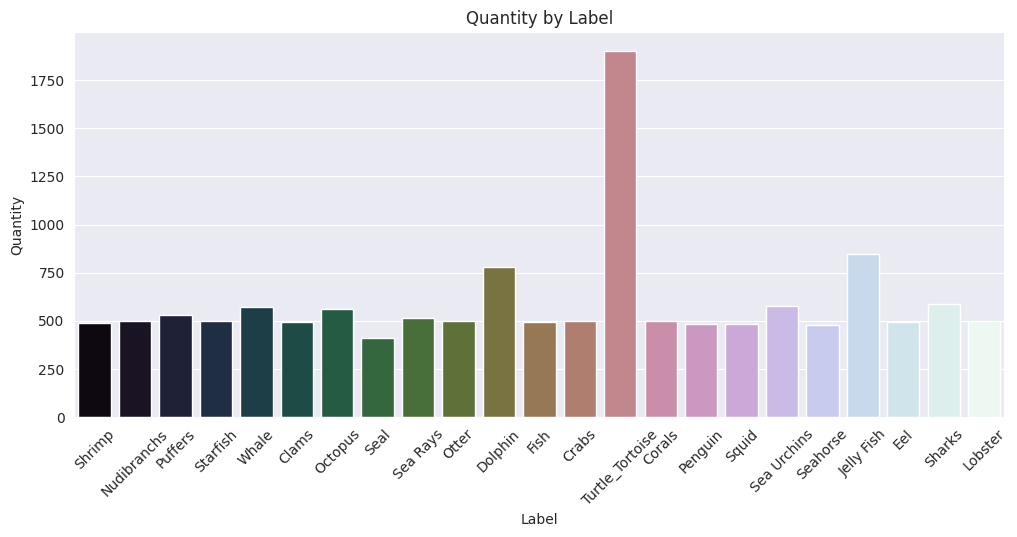

In [ ]:
src = os.listdir(dataset_path)
data = []

for lb in src:
    x = os.path.join(dataset_path, lb)
    y = os.listdir(x)
    data.append(len(y))

plt.figure(figsize=(12, 5))

sns.barplot(x=labels, y=data, palette= "cubehelix")

# Set plot title and labels
plt.title("Quantity by Label")
plt.xlabel("Label")
plt.ylabel("Quantity")
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Helper function to split data and plot the training loss

In [ ]:
# Generate data paths with labels
def define_paths(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels


# Concatenate data paths with labels into one dataframe ( to later be fitted into the model )
def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)

# Split dataframe to train, valid, and test
def split_data(data_dir):
    # train dataframe
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)
    strat = df['labels']
    train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

    # valid and test dataframe
    strat = dummy_df['labels']
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)

    return train_df, valid_df, test_df

In [ ]:
def create_gens (train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors. '''


    # define model parameters
    img_size = (224, 224)
    channels = 3 # either BGR or Grayscale
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    # Recommended : use custom function for test data batch size, else we can use normal batch size.
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function which will be used in image data generator for data augmentation, it just take the image and return it again.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function= scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)

    train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= True, batch_size= batch_size)

    # Note: we will use custom test_batch_size, and make shuffle= false
    test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= color, shuffle= False, batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

In [ ]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

In [ ]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights if they have to get restored

    # Define a function that will run when train begins
    def on_train_begin(self, logs= None):
        msg = 'Do you want model asks you to halt the training [y/n] ?'
        print(msg)
        ans = input('')
        if ans in ['Y', 'y']:
            self.ask_permission = 1
        elif ans in ['N', 'n']:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()


    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        # set the weights of the model to the best weights
        self.model.set_weights(self.best_weights)


    def on_train_batch_end(self, batch, logs= None):
        # get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()


    # Define method runs on the end of each epoch
    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        loss = logs.get('loss')  # get training loss for this epoch
        v_loss = logs.get('val_loss')  # get the validation loss for this epoch

        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc # define improvement of model progres

            if acc > self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc = acc # set new highest training accuracy
                self.best_weights = self.model.get_weights() # training accuracy improved so save the weights
                self.count = 0 # set count to 0 since training accuracy improved
                self.stop_count = 0 # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # set the value of best epoch for this epoch

            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count >= self.patience - 1: # lr should be adjusted
                    lr = lr * self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count = 0 # reset the count to 0
                    self.stop_count = self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count = 0 # reset counter
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1 # increment patience counter

        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0

            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss

            if v_loss < self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss = v_loss # replace lowest validation loss with new validation loss
                self.best_weights = self.model.get_weights() # validation loss improved so save the weights
                self.count = 0 # reset count since validation loss improved
                self.stop_count = 0
                self.best_epoch = epoch + 1 # set the value of the best epoch to this epoch

            else: # validation loss did not improve
                if self.count >= self.patience - 1: # need to adjust lr
                    lr = lr * self.factor # adjust the learning rate
                    self.stop_count = self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count = 0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer

                else:
                    self.count = self.count + 1 # increment the patience counter

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True # stop training

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'enter H to halt training or an integer for number of epochs to run then ask again'
                    print(msg)

                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'training has been halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True # stop training

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)

                        except Exception:
                            print('Invalid')

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap= plt.cm.Blues, print_option=True):
	'''
	This function plot confusion matrix method from sklearn package.
	'''

	plt.figure(figsize= (10, 10))
	plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
	plt.title(title)
	plt.colorbar()

	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')

	else:
		print('Confusion Matrix, Without Normalization')
	if print_option == True:
		print(cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

### Split dataset into train (80%), validation(10%) and test set (10%)

In [ ]:

try:
    # Get splitted data
    train_df, valid_df, test_df = split_data(dataset_path)

    # Get Generators
    batch_size = 40
    train_gen, valid_gen, test_gen = create_gens(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid Input')

Found 10968 validated image filenames belonging to 23 classes.
Found 1371 validated image filenames belonging to 23 classes.
Found 1372 validated image filenames belonging to 23 classes.


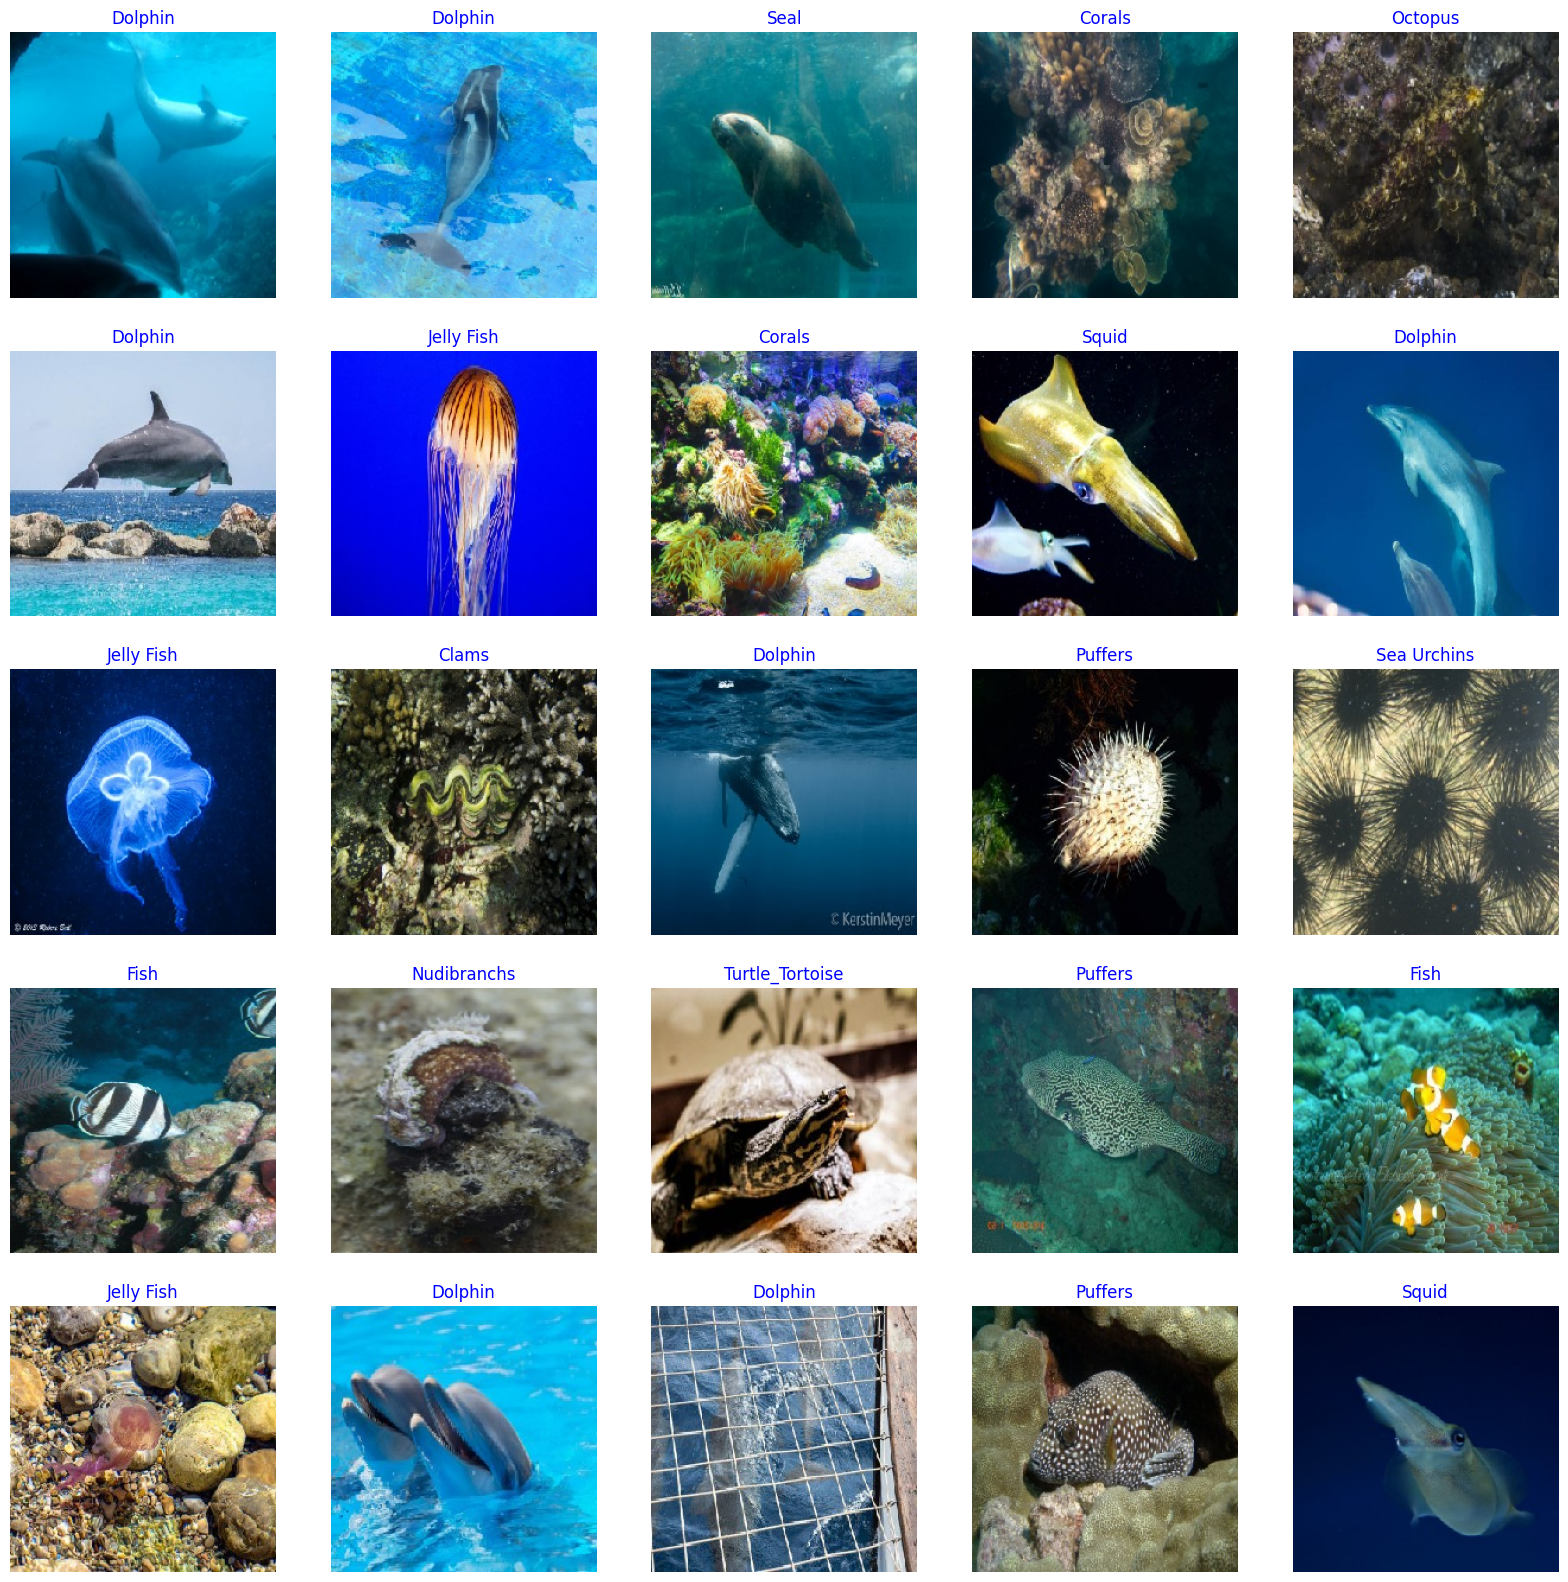

In [ ]:
show_images(train_gen)

## EfficientnetB5 as backbone

###  Create Model Structure

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (pretrained model:  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model_EfficientNetB5 = tf.keras.applications.efficientnet.EfficientNetB5(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
base_model_EfficientNetB5.trainable = False #Since many pre-trained models have a `tf.keras.layers.BatchNormalization` layer, it’s important to freeze those layers. Otherwise, the layer mean and variance will be updated
model_EfficientNetB5 = Sequential([
    base_model_EfficientNetB5,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model_EfficientNetB5.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_EfficientNetB5.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional  (None, 2048)              28513527  
 )                                                               
                                                                 
 batch_normalization_3 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 23)                5911      
                                                                 
Total params: 29052174 (110.83 MB)
Trainable params: 5

### Set Callback Parameters

In [ ]:
batch_size = 40   # set batch size for training
epochs = 40   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(model= model_EfficientNetB5, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

### Train model

In [ ]:
history = model_EfficientNetB5.fit(x= train_gen, epochs= epochs, verbose= 0, callbacks= callbacks,
                    validation_data= valid_gen, validation_steps= None, shuffle= False)

Do you want model asks you to halt the training [y/n] ?
n
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
 1 /40     7.056   67.132   4.87887  76.878   0.00100  0.00100  accuracy     0.00    104.52 
 2 /40     3.875   76.668   2.94898  78.629   0.00100  0.00100  accuracy    14.21    79.98  
 3 /40     2.468   79.057   2.04113  79.212   0.00100  0.00100  accuracy     3.12    81.29  
 4 /40     1.813   79.805   1.63806  79.431   0.00100  0.00100  accuracy     0.95    79.83  
 5 /40     1.509   80.206   1.42610  79.139   0.00100  0.00100  accuracy     0.50    79.82  
 6 /40     1.358   80.844   1.33635  78.848   0.00100  0.00100  accuracy     0.80    79.92  
 7 /40     1.271   80.580   1.26841  79.504   0.00100  0.00050  accuracy    -0.33    79.86  
 8 /40     1.164   82.960   1.19107  80.015   0.00050  0.00050  accuracy     2.62    79.84  
 9 /40     1.108   83.233   1.16230  80.088   0.00050  0.00050  accuracy     0.33    79.63  
10 /40     1.

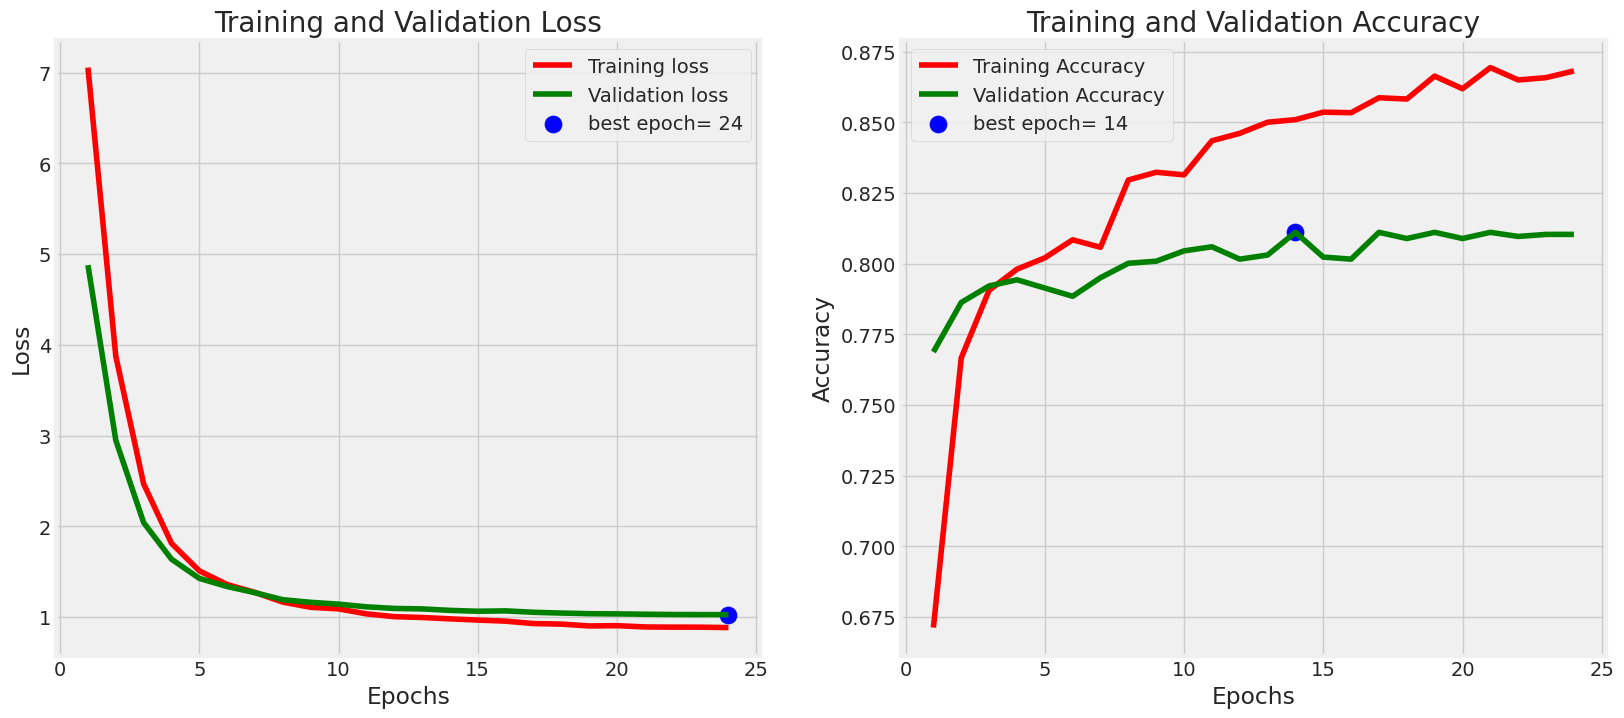

In [ ]:
plot_training(history)

### Loss and accuracy

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model_EfficientNetB5.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model_EfficientNetB5.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model_EfficientNetB5.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

28/28 [==============================] - 10s 303ms/step - loss: 0.9898 - accuracy: 0.8258
Train Loss:  0.7509656548500061
Train Accuracy:  0.9008928537368774
--------------------
Validation Loss:  1.0386682748794556
Validation Accuracy:  0.8071428537368774
--------------------
Test Loss:  0.9898008108139038
Test Accuracy:  0.8258017301559448


In [ ]:
preds = model_EfficientNetB5.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[21 21  9 ... 16  9  8]


### Confusion matrix

Confusion Matrix, Without Normalization
[[ 28   5   2   0   2   1   0   0   1   5   0   0   0   0   0   0   0   2
    2   0   0   1   0]
 [  6  36   0   0   0   1   0   0   0   4   0   0   0   0   0   1   0   0
    2   0   0   0   0]
 [  0   0  47   0   0   0   0   1   0   1   0   0   0   0   0   0   0   0
    1   0   0   0   0]
 [  0   0   0  65   0   0   1   0   0   0   0   0   0   1   0   0   1   0
    0   0   0   6   5]
 [  0   3   0   0  34   2   0   0   0   2   0   0   0   1   1   2   1   0
    2   0   0   1   1]
 [  0   3   0   0   1  33   0   0   0   1   0   1   3   4   0   1   0   0
    0   2   0   0   0]
 [  0   2   0   0   0   0  81   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   1   0]
 [  0   1   0   0   0   0   0  43   0   1   0   0   0   2   0   0   0   0
    3   0   0   0   0]
 [  2   1   0   0   0   1   0   0  36   3   0   0   1   0   0   1   0   0
    4   1   0   0   0]
 [  1   3   1   0   0   0   1   0   1  43   0   0   1   1   0   0   0   0
    1   1   0

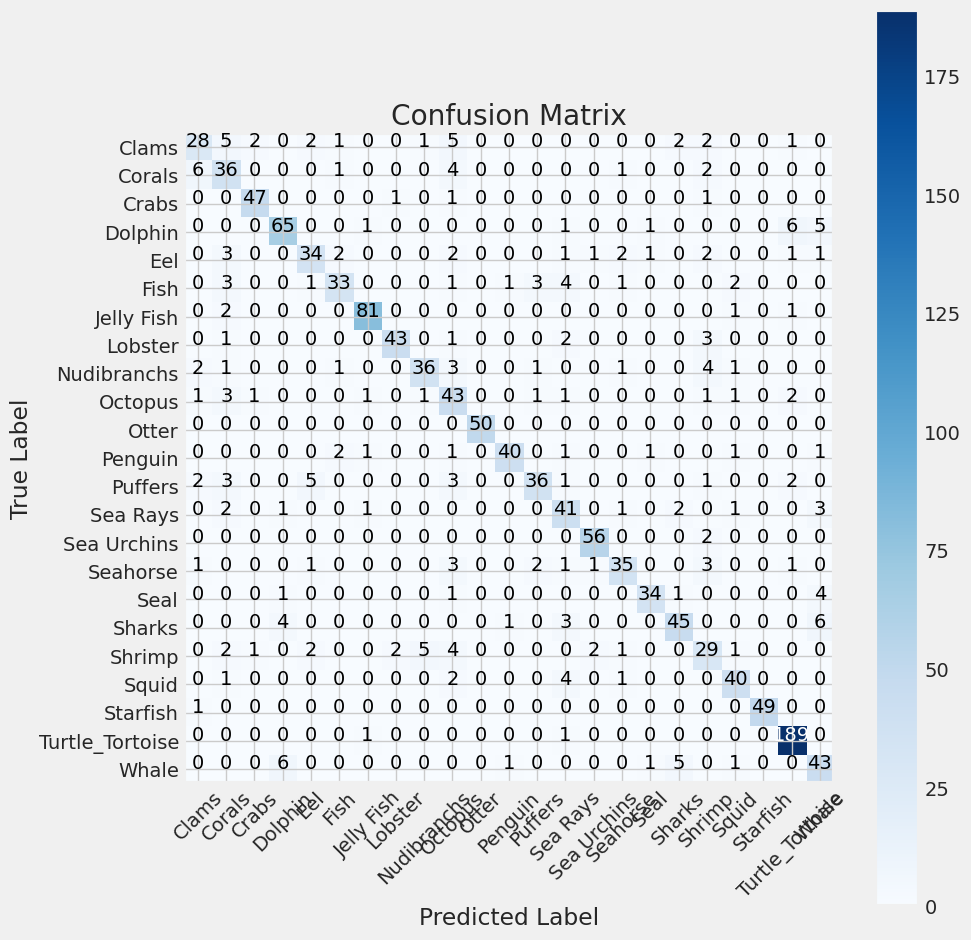

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [ ]:
model_name = model_EfficientNetB5.input_names[0][:-6]
subject = 'Sea Animals'
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model_EfficientNetB5.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model_EfficientNetB5.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

## Resnet50 as backbone

###  Create Model Structure

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (pretrained model:  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model_resnet50 = tf.keras.applications.resnet50.ResNet50(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max') #`include_top=False`: not interested in the last layer of the model. Since models are visualized from bottom to top, that layer is referred to as the top layer.
base_model_resnet50.trainable = False # freeze pretrained model

model_resnet50 = Sequential([
    tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input, input_shape=(*img_size, 3)),
    base_model_resnet50,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model_resnet50.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_resnet50.summary()


94765736/94765736 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 23)                59

### Set Callback Parameters

In [ ]:
batch_size = 40   # set batch size for training
epochs = 40   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

callbacks_resnet50 = [MyCallback(model= model_resnet50, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

### Train model

In [ ]:
history_resnet50 = model_resnet50.fit(x= train_gen, epochs= epochs, verbose= 0, callbacks= callbacks_resnet50,
                    validation_data= valid_gen, validation_steps= None, shuffle= False)

Do you want model asks you to halt the training [y/n] ?
n
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
 1 /40     7.410   64.314   5.22864  80.233   0.00100  0.00100  accuracy     0.00    50.56  
 2 /40     4.219   78.538   3.22355  82.495   0.00100  0.00100  accuracy    22.12    41.76  
 3 /40     2.687   82.932   2.20129  82.349   0.00100  0.00100  accuracy     5.60    41.71  
 4 /40     1.910   84.747   1.69989  82.932   0.00100  0.00100  accuracy     2.19    41.29  
 5 /40     1.517   85.904   1.42750  83.224   0.00100  0.00100  accuracy     1.37    41.69  
 6 /40     1.313   86.278   1.30858  82.786   0.00100  0.00100  accuracy     0.44    41.20  
 7 /40     1.209   86.151   1.22866  83.807   0.00100  0.00050  accuracy    -0.15    41.50  
 8 /40     1.079   88.968   1.15329  83.735   0.00050  0.00050  accuracy     3.12    41.48  
 9 /40     1.014   89.551   1.11653  83.662   0.00050  0.00050  accuracy     0.66    41.41  
10 /40     0.

In [ ]:
# Save resnet50 history as pickle file
import pickle
with open('/trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history_resnet50.history, file_pi)

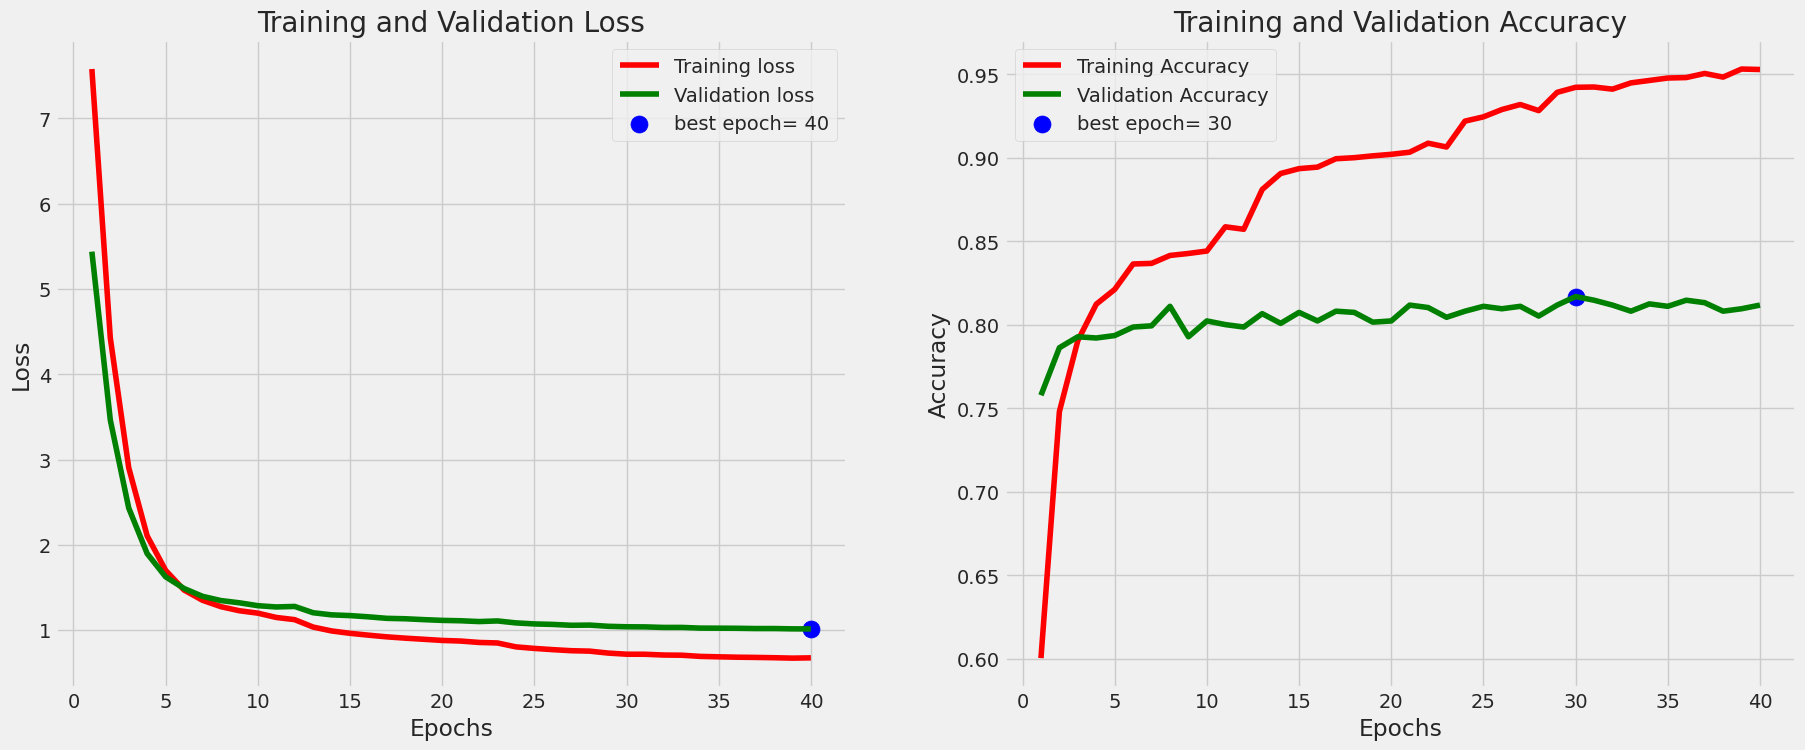

In [ ]:
plot_training(history_resnet50)

### Loss and accuracy

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model_resnet50.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model_resnet50.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model_resnet50.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

28/28 [==============================] - 6s 168ms/step - loss: 1.0532 - accuracy: 0.8120
Train Loss:  0.5965750217437744
Train Accuracy:  0.9741071462631226
--------------------
Validation Loss:  0.9925767183303833
Validation Accuracy:  0.8196428418159485
--------------------
Test Loss:  1.0532382726669312
Test Accuracy:  0.8119533658027649


In [ ]:
preds = model_resnet50.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[21 21  6 ... 17  9  8]


### Confusion matrix

Confusion Matrix, Without Normalization
[[ 34   4   0   0   0   0   1   4   1   0   0   1   0   1   0   0   0   0
    1   1   0   0   1]
 [  1  31   0   0   1   5   0   2   0   5   0   0   0   0   1   2   0   0
    2   0   0   0   0]
 [  0   0  50   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  69   0   0   1   0   0   0   0   1   0   1   0   1   2   1
    0   0   0   1   2]
 [  1   3   1   0  37   0   0   0   0   1   0   0   1   1   0   1   0   0
    2   1   0   0   1]
 [  0   5   0   0   3  33   0   0   1   1   0   0   1   0   0   0   0   1
    1   2   0   0   1]
 [  1   0   0   0   0   1  75   0   0   0   0   0   0   0   1   1   1   0
    0   0   0   4   1]
 [  1   1   2   0   1   2   0  33   0   1   0   0   1   0   0   0   0   0
    8   0   0   0   0]
 [  3   0   1   0   0   1   0   1  35   0   0   0   0   0   1   2   0   0
    5   1   0   0   0]
 [  2   4   0   0   1   1   2   0   1  35   0   0   0   0   0   3   0   0
    2   1   1

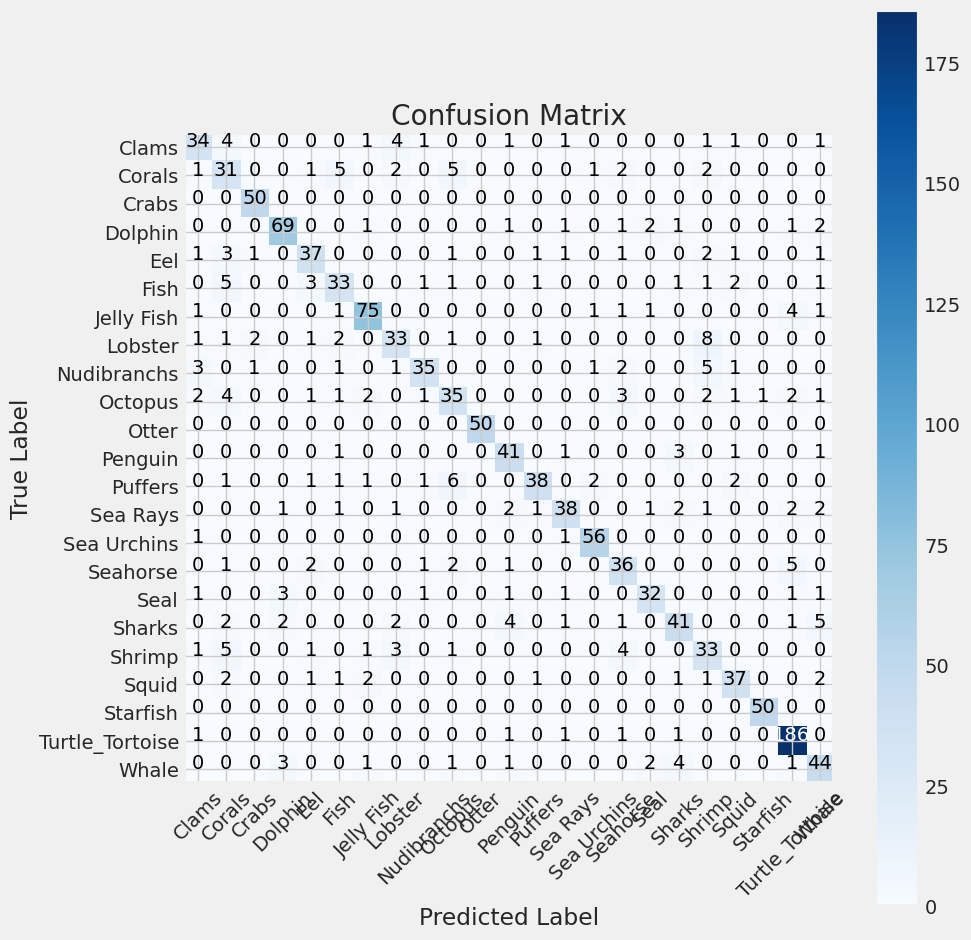

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [ ]:
model_name = model_resnet50.input_names[0][:-6]
subject = 'Sea Animals'
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model_resnet50.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model_resnet50.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

model was saved as resnet50-Sea Animals-81.20.h5
weights were saved as resnet50-Sea Animals-weights.h5


## MobilenetV2 as backbone

###  Create Model Structure

In [ ]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (pretrained model:  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model_mobilenet_v2 = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max') #`include_top=False`: not interested in the last layer of the model. Since models are visualized from bottom to top, that layer is referred to as the top layer.
base_model_mobilenet_v2.trainable = False # freeze pretrained model
model_mobilenet_v2 = Sequential([
    base_model_mobilenet_v2,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model_mobilenet_v2.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model_mobilenet_v2.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 23)                5911      
                                                           

### Set Callback Parameters

In [ ]:
batch_size = 40   # set batch size for training
epochs = 40   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

callbacks_mobilenet_v2 = [MyCallback(model= model_mobilenet_v2, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

### Train model

In [ ]:
history_mobilenet_v2 = model_mobilenet_v2.fit(x= train_gen, epochs= epochs, verbose= 0, callbacks= callbacks_mobilenet_v2,
                    validation_data= valid_gen, validation_steps= None, shuffle= False)

Do you want model asks you to halt the training [y/n] ?
n
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration
 1 /40     8.603   22.830   6.66219  33.771   0.00100  0.00100  accuracy     0.00    43.71  
 2 /40     5.819   33.680   4.88586  38.074   0.00100  0.00100  accuracy    47.52    26.46  
 3 /40     4.355   37.938   3.83322  39.241   0.00100  0.00100  accuracy    12.64    25.73  
 4 /40     3.519   39.661   3.22403  40.627   0.00100  0.00100  accuracy     4.54    26.53  
 5 /40     3.025   41.922   2.88079  41.284   0.00100  0.00100  accuracy     5.70    37.11  
 6 /40     2.748   43.344   2.69207  41.065   0.00100  0.00100  accuracy     3.39    28.71  
 7 /40     2.578   44.520   2.57841  41.284   0.00100  0.00100  accuracy     2.71    27.54  
 8 /40     2.476   45.441   2.51823  42.451   0.00100  0.00100  accuracy     2.07    26.79  
 9 /40     2.413   45.387   2.47024  42.961   0.00100  0.00050  accuracy    -0.12    25.31  
10 /40     2.

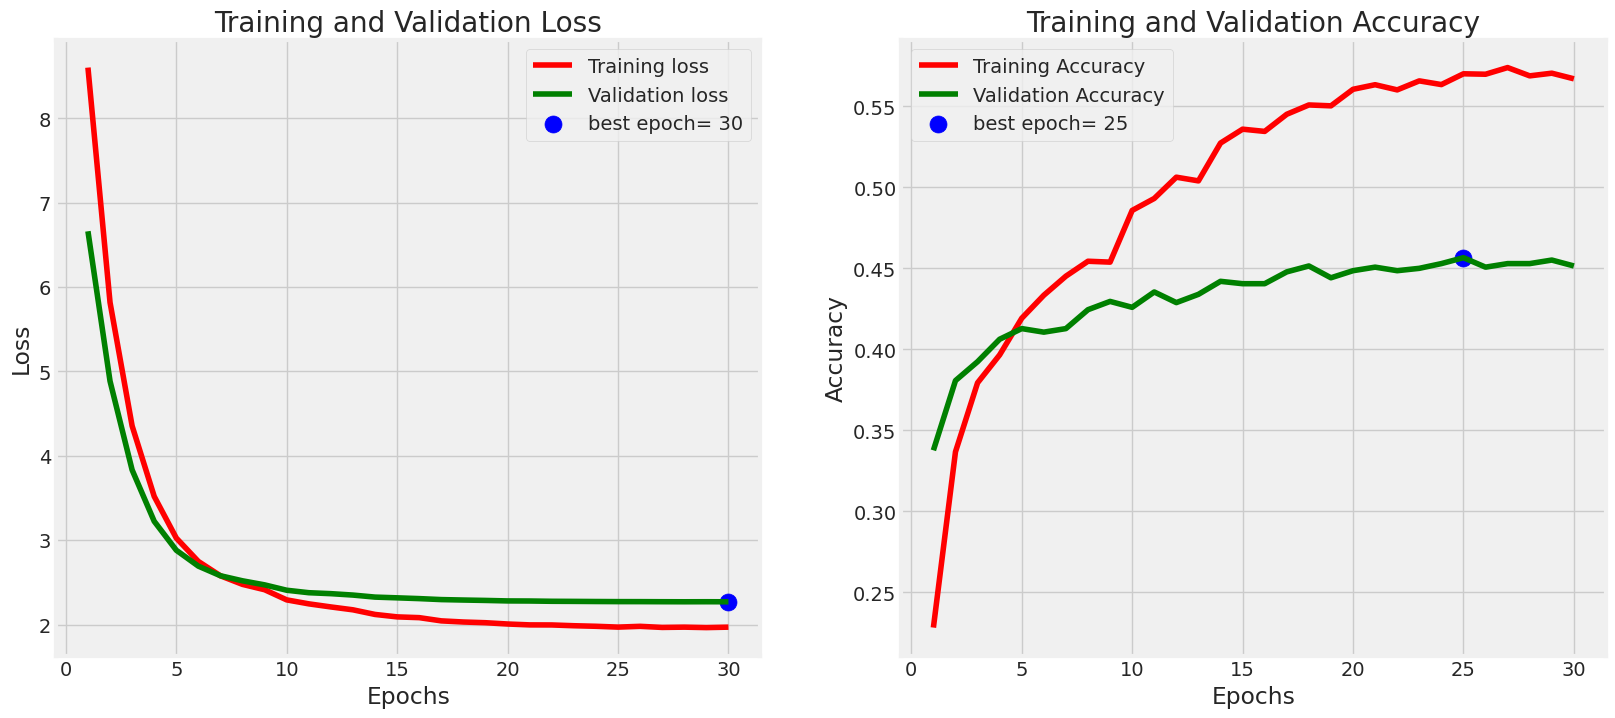

In [ ]:
plot_training(history_mobilenet_v2)

### Loss and accuracy

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model_mobilenet_v2.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model_mobilenet_v2.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model_mobilenet_v2.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

28/28 [==============================] - 4s 106ms/step - loss: 2.3276 - accuracy: 0.4395
Train Loss:  1.887624740600586
Train Accuracy:  0.6107142567634583
--------------------
Validation Loss:  2.273131847381592
Validation Accuracy:  0.4508928656578064
--------------------
Test Loss:  2.327564001083374
Test Accuracy:  0.43950438499450684


In [ ]:
preds = model_mobilenet_v2.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

[ 2 21  3 ...  3  8 18]


### Confusion matrix

Confusion Matrix, Without Normalization
[[ 13   4   3   0   1   1   0   1   1   3   0   0   0   0   2   0   2   1
    0   1   2  14   0]
 [  2  20   0   2   2   1   0   0   1   3   1   0   2   2   1   1   0   0
    1   0   2   9   0]
 [  0   2  25   1   0   0   0   2   2   2   0   0   0   0   0   0   0   0
    2   0   2  12   0]
 [  0   0   0  40   0   0   1   1   0   0   2   5   0   1   0   1   4   8
    0   2   0   4  10]
 [  2   5   1   0   5   2   0   7   3   1   1   1   2   2   0   4   0   0
    1   0   3  10   0]
 [  1   3   0   2   2   8   3   1   0   1   0   1   5   2   2   1   1   2
    2   1   1   9   1]
 [  0   0   2   0   0   3  62   0   0   0   1   0   2   1   2   0   2   1
    0   4   0   3   2]
 [  2   1   5   3   1   0   0  14   1   4   0   0   1   0   2   1   0   0
    4   0   3   8   0]
 [  4   1   4   1   0   0   1   0  14   0   0   0   2   1   0   1   0   0
    8   2   2   9   0]
 [  1   9   1   1   5   1   2   0   4   6   2   1   3   1   0   1   0   0
    2   1   7

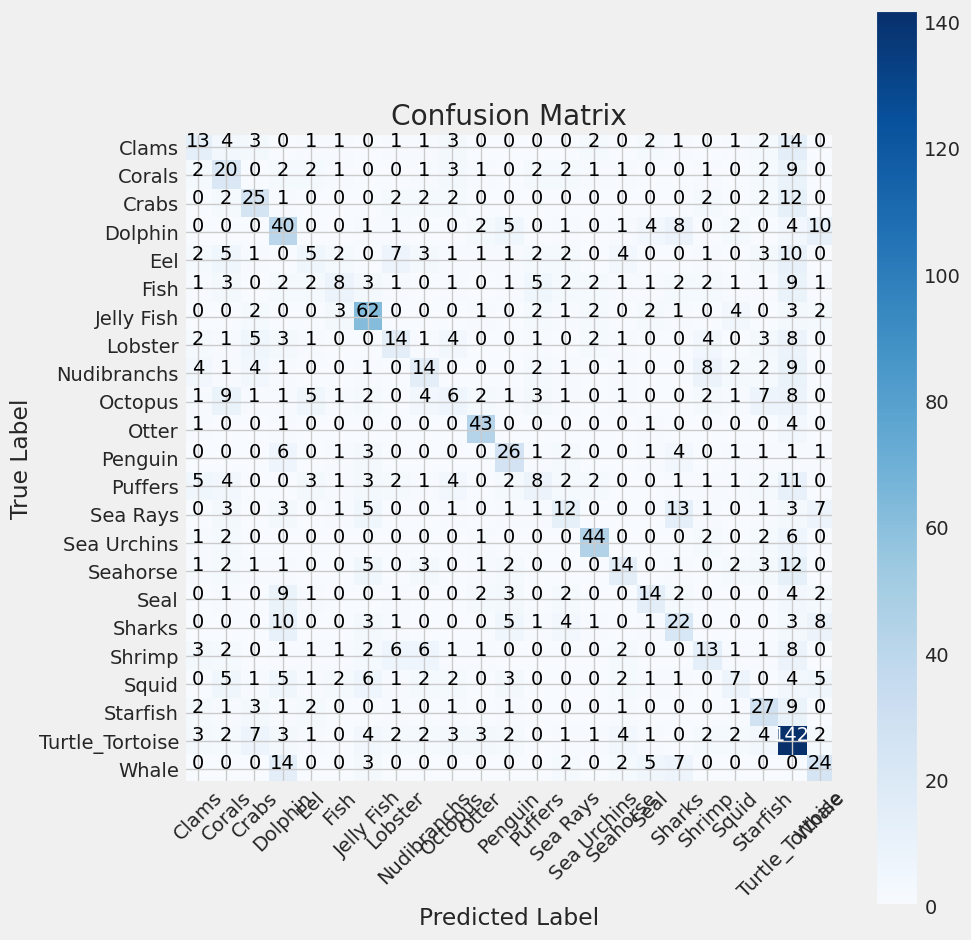

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [ ]:
model_name = model_mobilenet_v2.input_names[0][:-6]
subject = 'Sea Animals'
acc = test_score[1] * 100
save_path = ''

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model_mobilenet_v2.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model_mobilenet_v2.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

model was saved as mobilenetv2_1.00_224-Sea Animals-43.95.h5
weights were saved as mobilenetv2_1.00_224-Sea Animals-weights.h5


# Results comparison and discussions

## Download the trained models and weights

In order to do the evaluation on different metrics which didn't happen immediately after the training session, the models' weights and architectures were saved into h5 files. When needed, we only need to load them up and reuse them without the need to retrain.

In [ ]:
!gdown 1Usv0wRNoLC4hRI11nxVbb8La0QwWPi0F
!gdown 1CM3fpEnA8NYHEUZUmyRPTl85SjRJ_DW3
!gdown 1S0-q91fe-Y8yk3QYwJGffnUcQasOUePK
!gdown 1CZuWD3bqWCDSshwUvQXHnUuePhNEQI8i
!gdown 1fBk_njXl49WlIGeFnUzvQHCORVCsnbO9
!gdown 1JxP6A1i77Cx8yWXirhamDO1kY-veWR9o

Downloading...
From: https://drive.google.com/uc?id=1Usv0wRNoLC4hRI11nxVbb8La0QwWPi0F
To: /content/resnet50-Sea Animals-weights.h5
100% 96.8M/96.8M [00:00<00:00, 241MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CM3fpEnA8NYHEUZUmyRPTl85SjRJ_DW3
To: /content/efficientnetb5-Sea Animals-82.14.h5
100% 122M/122M [00:01<00:00, 70.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1S0-q91fe-Y8yk3QYwJGffnUcQasOUePK
To: /content/efficientnetb5-Sea Animals-weights.h5
100% 117M/117M [00:01<00:00, 73.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CZuWD3bqWCDSshwUvQXHnUuePhNEQI8i
To: /content/mobilenetv2_1.00_224-Sea Animals-43.95.h5
100% 13.4M/13.4M [00:00<00:00, 114MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1fBk_njXl49WlIGeFnUzvQHCORVCsnbO9
To: /content/mobilenetv2_1.00_224-Sea Animals-weights.h5
100% 10.6M/10.6M [00:00<00:00, 47.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JxP6A1i77Cx8yWXirhamDO1kY-veWR9o
To: /content/resnet50-Sea A

## Load the trained models for evaluation

In [ ]:
from keras.models import load_model
model_efficientnetb5 = load_model('efficientnetb5-Sea Animals-82.14.h5')
model_mobilenetv2 = load_model('mobilenetv2_1.00_224-Sea Animals-43.95.h5')
model_resnet50 = load_model('resnet50-Sea Animals-81.20.h5')

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score_resnet50 = model_resnet50.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score_resnet50 = model_resnet50.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score_resnet50 = model_resnet50.evaluate(test_gen, steps= test_steps, verbose= 1)

train_score_efficientnetb5 = model_efficientnetb5.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score_efficientnetb5 = model_efficientnetb5.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score_efficientnetb5 = model_efficientnetb5.evaluate(test_gen, steps= test_steps, verbose= 1)

train_score_mobilenetv2 = model_mobilenetv2.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score_mobilenetv2 = model_mobilenetv2.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score_mobilenetv2 = model_mobilenetv2.evaluate(test_gen, steps= test_steps, verbose= 1)

28/28 [==============================] - 3s 95ms/step - loss: 1.9792 - accuracy: 0.5612


In [ ]:
preds_resnet50 = np.argmax(model_resnet50.predict_generator(test_gen), 1)
preds_efficientnetb5 = np.argmax(model_efficientnetb5.predict_generator(test_gen), 1)
preds_mobilenetv2 = np.argmax(model_mobilenetv2.predict_generator(test_gen), 1)

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())
report_resnet50 = classification_report(test_gen.classes, preds_resnet50, target_names= classes, output_dict=True)
report_efficientnetb5 = classification_report(test_gen.classes, preds_efficientnetb5, target_names= classes, output_dict=True)
report_mobilenetv2 = classification_report(test_gen.classes, preds_mobilenetv2, target_names= classes, output_dict=True)

In [ ]:
print(report_resnet50)

{'Clams': {'precision': 0.9318181818181818, 'recall': 0.8367346938775511, 'f1-score': 0.8817204301075268, 'support': 49}, 'Corals': {'precision': 0.7868852459016393, 'recall': 0.96, 'f1-score': 0.8648648648648649, 'support': 50}, 'Crabs': {'precision': 0.9074074074074074, 'recall': 0.98, 'f1-score': 0.9423076923076924, 'support': 50}, 'Dolphin': {'precision': 0.9404761904761905, 'recall': 1.0, 'f1-score': 0.9693251533742331, 'support': 79}, 'Eel': {'precision': 0.9130434782608695, 'recall': 0.84, 'f1-score': 0.8749999999999999, 'support': 50}, 'Fish': {'precision': 0.9285714285714286, 'recall': 0.7959183673469388, 'f1-score': 0.8571428571428572, 'support': 49}, 'Jelly Fish': {'precision': 0.9651162790697675, 'recall': 0.9764705882352941, 'f1-score': 0.9707602339181286, 'support': 85}, 'Lobster': {'precision': 0.9347826086956522, 'recall': 0.86, 'f1-score': 0.8958333333333334, 'support': 50}, 'Nudibranchs': {'precision': 0.92, 'recall': 0.92, 'f1-score': 0.92, 'support': 50}, 'Octopus':

Confusion Matrix, Without Normalization


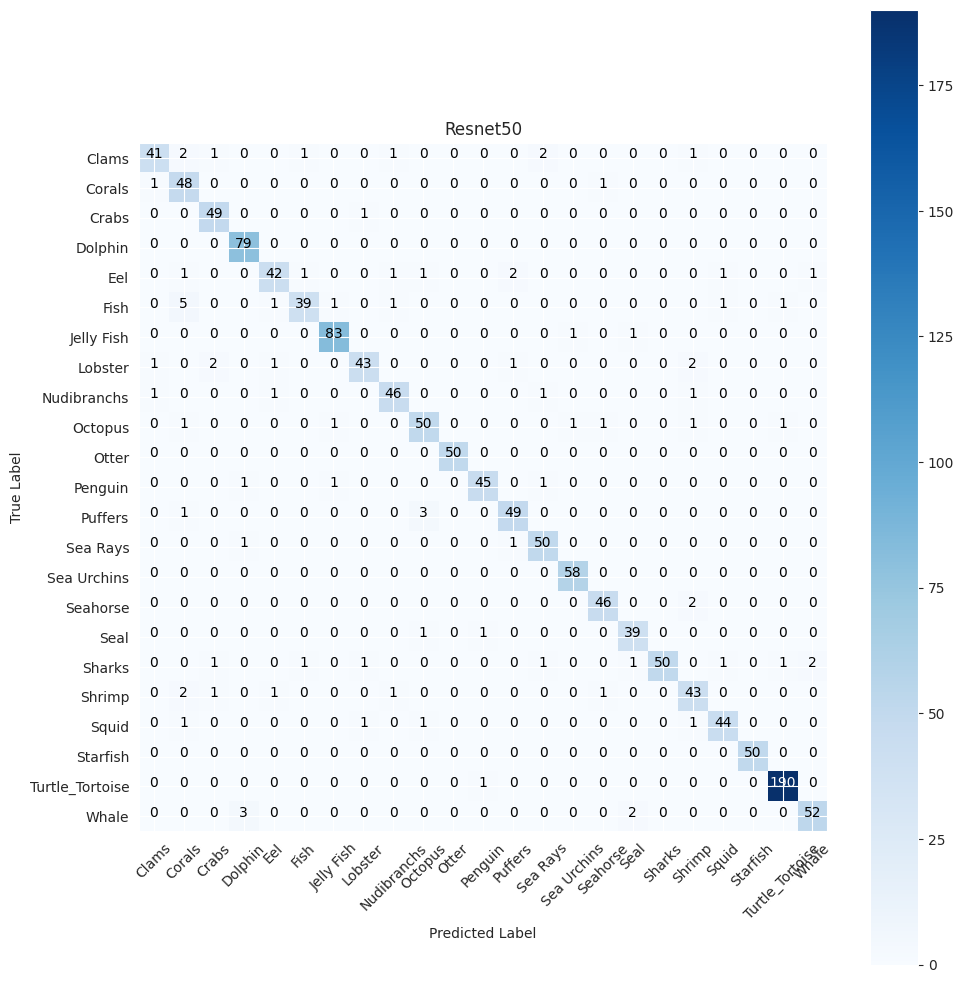

In [ ]:
# Resnet50 confusion matrix
cm_resnet50 = confusion_matrix(test_gen.classes, preds_resnet50)

plot_confusion_matrix(cm= cm_resnet50, classes= classes, title = 'Resnet50', print_option=False)

Confusion Matrix, Without Normalization


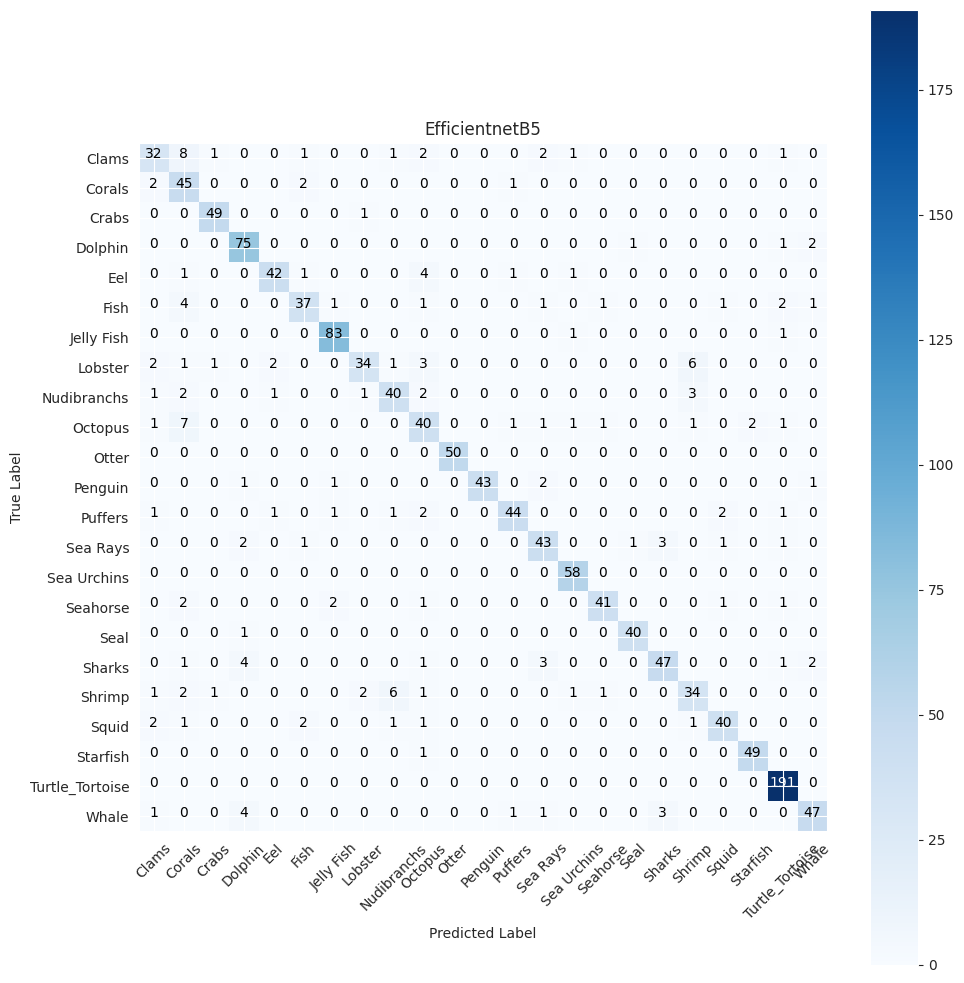

In [ ]:
# EfficientnetB5 confusion matrix
cm_efficientnetb5 = confusion_matrix(test_gen.classes, preds_efficientnetb5)

plot_confusion_matrix(cm= cm_efficientnetb5, classes= classes, title = 'EfficientnetB5', print_option=False)

Confusion Matrix, Without Normalization


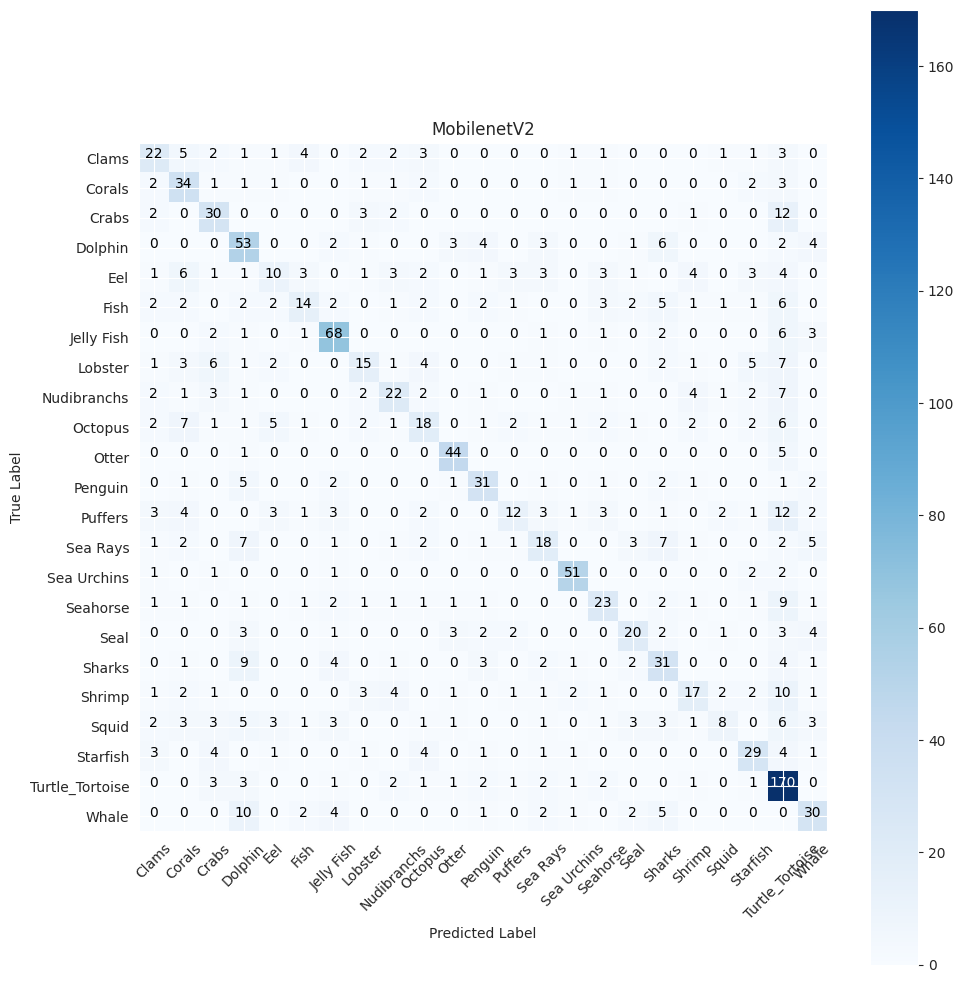

In [ ]:
# MobilenetV2 confusion matrix
cm_mobilenetv2 = confusion_matrix(test_gen.classes, preds_mobilenetv2)

plot_confusion_matrix(cm= cm_mobilenetv2, classes= classes, title = 'MobilenetV2', print_option=False)

In [ ]:
import pandas as pd

resnet_50_info_list = [train_score_resnet50[1], test_score_resnet50[1], valid_score_resnet50[1], report_resnet50['weighted avg']['precision'], report_resnet50['weighted avg']['recall'], report_resnet50['weighted avg']['f1-score']]
efficientnet_b5_info_list = [train_score_efficientnetb5[1], test_score_efficientnetb5[1], valid_score_efficientnetb5[1], report_efficientnetb5['weighted avg']['precision'], report_efficientnetb5['weighted avg']['recall'], report_efficientnetb5['weighted avg']['f1-score']]
mobilenet_v2_info_list = [train_score_mobilenetv2[1], test_score_mobilenetv2[1], valid_score_mobilenetv2[1], report_mobilenetv2['weighted avg']['precision'], report_mobilenetv2['weighted avg']['recall'], report_mobilenetv2['weighted avg']['f1-score']]

df = pd.DataFrame(data={"Resnet50":resnet_50_info_list, "EfficienctnetB5":efficientnet_b5_info_list, "MobilenetV2":mobilenet_v2_info_list})
df.index = ["Train accuracy", "Test accuracy", "Validation accuracy", "Precision", "Recall", "F1-score"]
df

Resnet50  EfficienctnetB5  MobilenetV2
Train accuracy       0.934821         0.888393     0.566071
Test accuracy        0.937318         0.877551     0.561224
Validation accuracy  0.949107         0.889286     0.585714
Precision            0.939004         0.881820     0.547809
Recall               0.937318         0.877551     0.561224
F1-score             0.936992         0.877068     0.540052

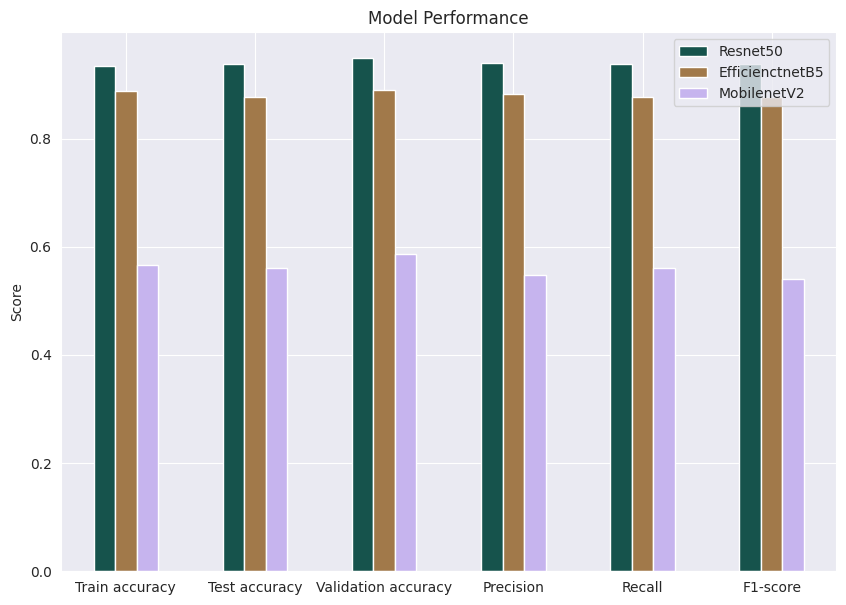

In [ ]:
df.plot(kind='bar', figsize=(10, 7), color= sns.color_palette("cubehelix", len(df.columns)))
plt.title('Models Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

Models comparison:
*   As shown in the table above, **ResNet50** has the best overall results that are over 0.9 on all metrics. This can be explained by looking at the 50 layers that it has. Although its accuracy, precision, recall, and F1-score is high, the training as well as inferencing time is slower than **MobileNetV2** around 1.5 times. **ResNet50** has the best classification quality in the 3 models can be justified by looking at its implementation of "skipping connection", which helps improve the conversion of the network.
*   **EfficientNetB5** is in the middle of the pack. Having a faster inference and training time than **ResNet50** while still maintaining a better classification quality than that of **MobileNetV2**. The implementation of coumpound scaling and depthwise separable convolution has enabled it to a balance model with the best efficiency-accuracy ratio.
*   **MobileNetV2** was created for the purpose of speed and lightweightness in order to be run on embedded devices and low resource devices. The model using the **MobileNetV2** backbone sacrifices the quality of the classifications in order to gain inference and training speed with a small model size. Therefore, its performance is rather inferior to the other two models, at around 0.5-0.6 in accuracy. The inference speed makes up for the quality as it is faster than all the other models, which allows predicting with a higher frames per second (FPS).

Dataset thoughts:
*   The dataset is a rather large one, with close to 14 thousand images with decent resolution (resized to close to 300x300) with 23 classes of animals to consider. However, the dataset itself is rather imbalanced because the amount of turtle_tortoise images far exceeds the others (almost triple the average number of the other classes). This means that the accuracy metric is not a good metric to use to evaluate the models.
*   Nevertheless, the precision, recall, and F1-score metrics all reflect the same result:
    *   Inference speed in descending order: MobileNetV2, EfficientNetB5, ResNet50.
    *   Quality of classifications in descending order: ResNet50, EfficientNetB5, MobileNetV2.
